In [123]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

In [124]:
df = pd.read_csv('Social_Network_Ads.csv')

In [125]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [126]:
X = df.iloc[:,2:4]
y = df.iloc[:,4:]

Train Test split

In [127]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train ,y_test = train_test_split(X ,y , test_size=0.3)

In [128]:
X_train.shape, X_test.shape

((280, 2), (120, 2))

### StandardScaler

In [171]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [172]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [131]:
scaler.mean_

array([3.77142857e+01, 7.00321429e+04])

In [132]:
X_train

,Age,EstimatedSalary
281,35,61000
260,35,77000
86,24,55000
151,41,45000
46,25,79000
...,...,...
203,41,71000
276,38,71000
263,35,72000
373,59,130000


In [133]:
X_train_scaled

array([[-2.63372456e-01, -2.71430753e-01],
       [-2.63372456e-01,  2.09395571e-01],
       [-1.33072399e+00, -4.51740624e-01],
       [ 3.18819288e-01, -7.52257076e-01],
       [-1.23369203e+00,  2.69498861e-01],
       [-7.48532242e-01,  2.99550506e-01],
       [ 1.24755374e-01,  1.49292280e-01],
       [-4.57436370e-01, -3.01482398e-01],
       [-7.48532242e-01,  1.95239099e+00],
       [-1.13666007e+00,  2.99550506e-01],
       [ 1.67726669e+00, -9.32566947e-01],
       [ 3.18819288e-01, -1.20303175e+00],
       [ 4.15851246e-01, -1.51224172e-01],
       [ 9.98042990e-01,  7.80376830e-01],
       [ 9.98042990e-01, -1.11287682e+00],
       [ 2.16242648e+00, -8.42412012e-01],
       [-1.13666007e+00, -1.59370314e+00],
       [ 1.96836256e+00, -6.92153786e-01],
       [ 2.06539452e+00,  2.19280416e+00],
       [-2.63372456e-01, -7.82308721e-01],
       [-1.42775594e+00, -1.26313504e+00],
       [ 9.01011032e-01,  1.29125480e+00],
       [ 7.06947118e-01,  2.69498861e-01],
       [-6.

In [134]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [135]:
np.round(X_test.describe(), 1)

,Age,EstimatedSalary
count,120.0,120.0
mean,37.5,69066.7
std,10.9,35945.5
min,18.0,15000.0
25%,29.0,41250.0
50%,37.0,65000.0
75%,45.2,90000.0
max,60.0,150000.0


In [136]:
np.round(X_test_scaled.describe(),1)

,Age,EstimatedSalary
count,120.0,120.0
mean,-0.0,-0.0
std,1.1,1.1
min,-1.9,-1.7
25%,-0.8,-0.9
50%,-0.1,-0.2
75%,0.7,0.6
max,2.2,2.4


### Effect of Scalling 

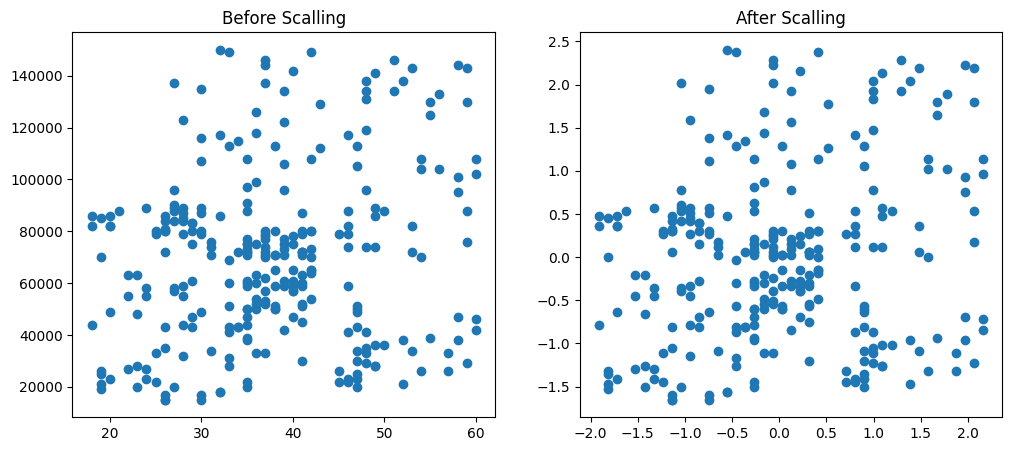

In [137]:
fig , (ax1, ax2) = plt.subplots(ncols=2 ,figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before Scalling')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'])
ax2.set_title('After Scalling')
plt.show()

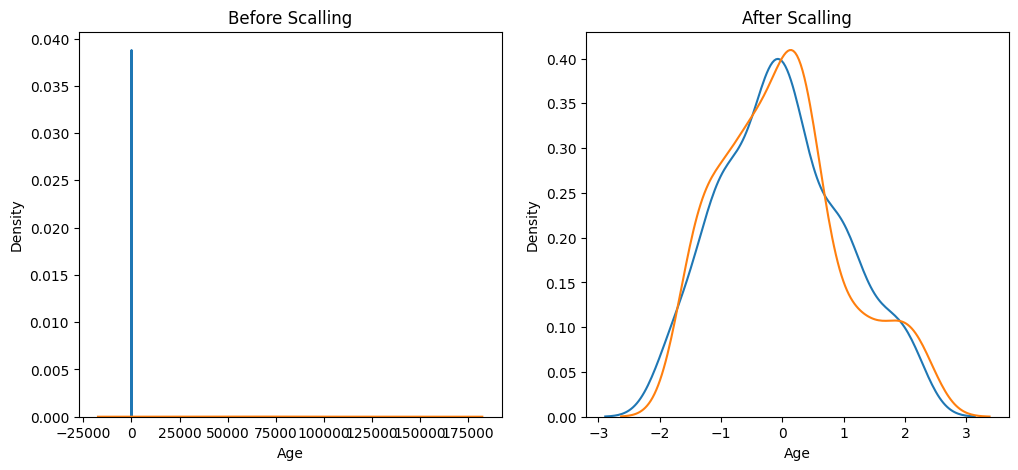

In [138]:
fig , (ax1, ax2) = plt.subplots(ncols=2 ,figsize=(12,5))

ax1.set_title('Before Scalling')
sns.kdeplot(X_train['Age'], ax = ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

ax2.set_title('After Scalling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

##### Why scaling is important?

In [139]:
from sklearn.linear_model import LogisticRegression

In [140]:
lr = LogisticRegression()
lr_scalled = LogisticRegression()

In [150]:
lr.fit(X_train,y_train)


c:\Users\Neelesh Yadav\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [151]:
lr_scalled.fit(X_train_scaled,y_train)

c:\Users\Neelesh Yadav\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [152]:
y_pred = lr.predict(X_test)

In [153]:
y_scalled_pred = lr_scalled.predict(X_test_scaled)

In [154]:
from sklearn.metrics import accuracy_score

In [155]:
print("Actual" , accuracy_score(y_test,y_pred))
print("Scalled" , accuracy_score(y_test,y_scalled_pred))

Actual 0.8
Scalled 0.7833333333333333


In [156]:
from sklearn.tree import DecisionTreeClassifier

In [158]:
dt = DecisionTreeClassifier()
dt_scalled = DecisionTreeClassifier()

In [161]:
dt.fit(X_train,y_train)
dt_scalled.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [164]:
d_pred = dt.predict(X_test)
d_scalled_pred = dt_scalled.predict(X_test_scaled)

In [165]:
print("Actual", accuracy_score(y_test,d_pred))
print("Scalled", accuracy_score(y_test,d_scalled_pred))

Actual 0.8583333333333333
Scalled 0.8583333333333333


I tried to model building by using scalled data or actual data and make predictions.
Sometimes accuracy increases and sometimes it does not on different models 